# Experiment Type 1

## $f(X) = A \cdot X + b$; $m \ge 1$; $s \ge 0$; $Z = N(0, \sigma^2)$

This is a simple class of experiments that linear regression should be
very good at. $F$ is a linear function of $X$, there are one or more
features, zero or more confounding features, and normally distributed
noise.

In [1]:
import impactstudy.experiment as ise
from impactchart.model import XGBoostImpactModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
N = 100

In [3]:
fg = ise.UniformFeatureGenerator(2, 2, low=0.0, high=100.0)

In [4]:
tg = ise.LinearNormalTargetGenerator([0.5, -1.0], 10.0)

In [5]:
sg = ise.ScenarioGenerator(fg, tg)

In [6]:
df = sg.scenario(N)

df

,y,x_0,x_1,c_0,c_1
0,37.169055,84.507479,16.097309,57.529583,76.677081
1,-5.536454,55.774455,36.807994,7.901793,15.900962
2,-33.235021,21.494196,38.582404,79.128458,94.529810
3,-52.328504,42.816450,61.134311,53.935114,51.503067
4,16.344115,73.638587,1.528966,71.020312,19.936061
...,...,...,...,...,...
95,-3.923387,80.071256,38.510323,97.313064,27.891028
96,-57.570852,87.484924,96.480190,2.592760,48.654942
97,-22.583698,26.847511,33.385908,93.008922,61.905772
98,-52.498301,41.853576,96.268009,51.047051,99.498220


In [7]:
df["y"] - (0.5 * df["x_0"] + df["x_1"])

0     -21.181994
1     -70.231676
2     -82.564523
3    -134.871040
4     -22.004144
         ...    
95    -82.469338
96   -197.793505
97    -69.393362
98   -169.693098
99   -125.143335
Length: 100, dtype: float64

In [8]:
df_true_impact = sg.impact(N)

df_true_impact

,x_0,x_1,c_0,c_1
0,18.137110,33.441134,0.0,0.0
1,3.770598,12.730449,0.0,0.0
2,-13.369532,10.956040,0.0,0.0
3,-2.708405,-11.595867,0.0,0.0
4,12.702664,48.009478,0.0,0.0
...,...,...,...,...
95,15.918998,11.028120,0.0,0.0
96,19.625832,-46.941747,0.0,0.0
97,-10.692874,16.152535,0.0,0.0
98,-3.189842,-46.729566,0.0,0.0


In [9]:
impact_model = XGBoostImpactModel(random_state=17)

In [10]:
X_prime = df[sg.x_prime_cols()]
y = df[sg.y_col()]

In [11]:
impact_model.fit(X_prime, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


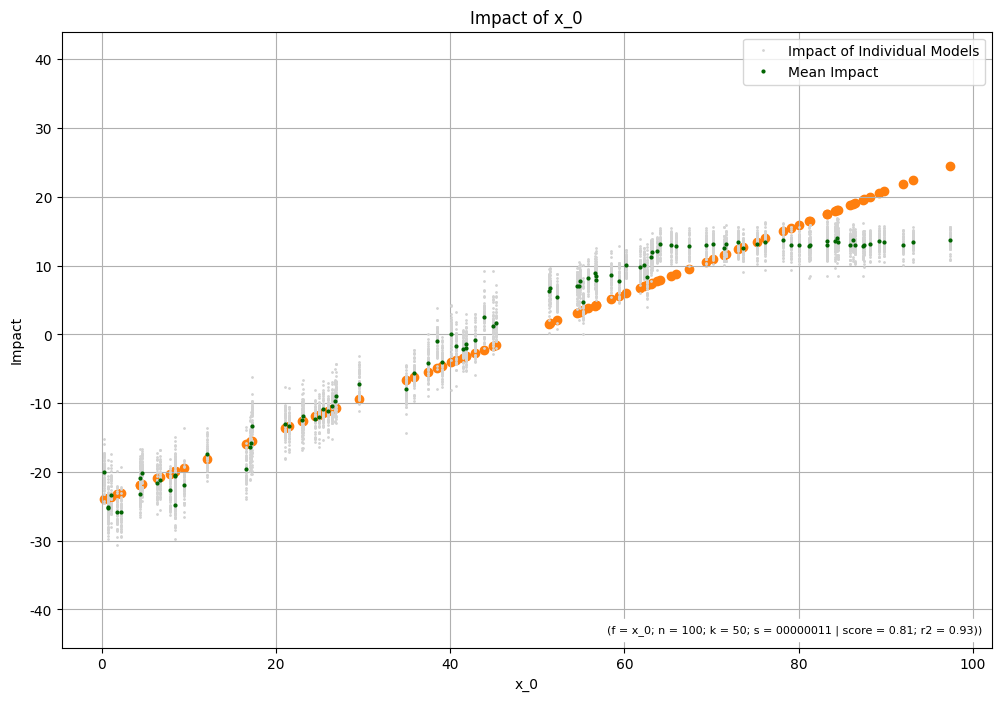

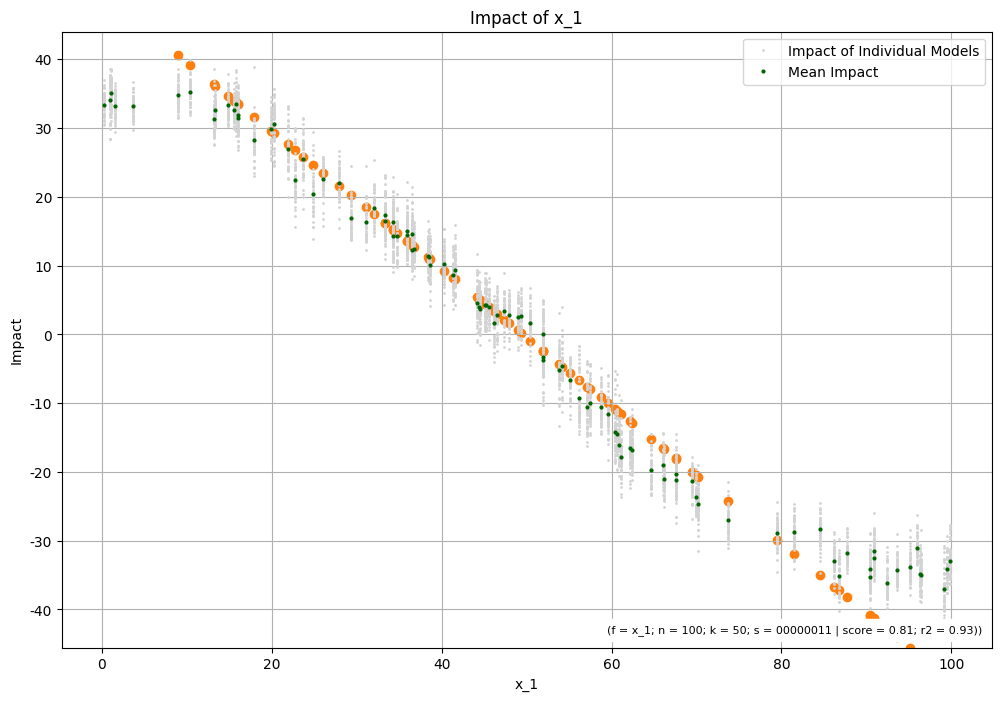

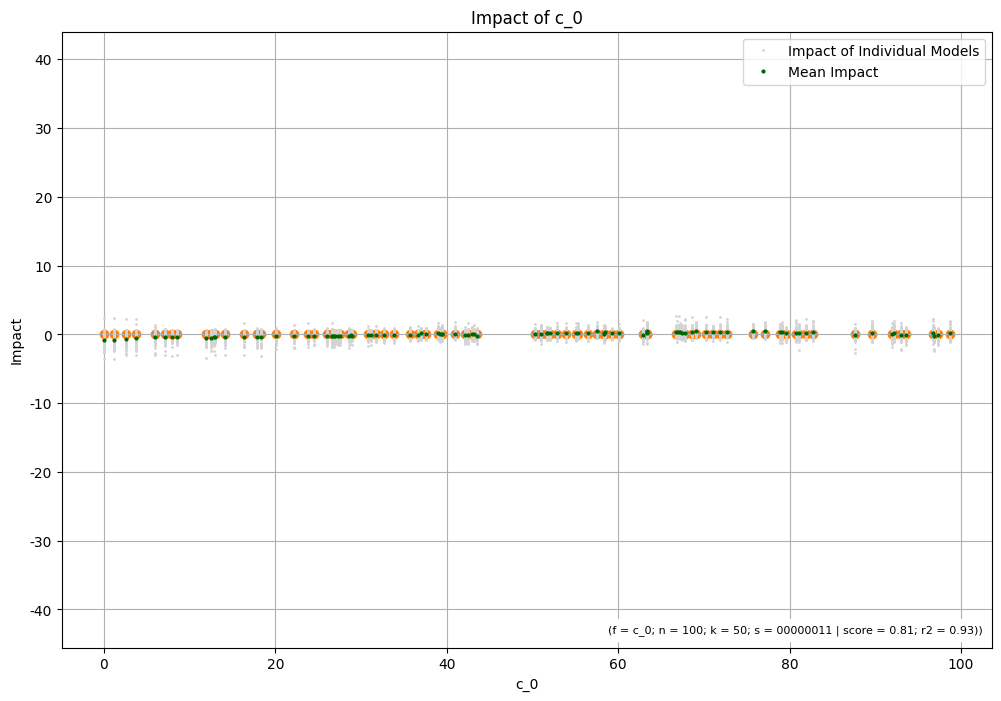

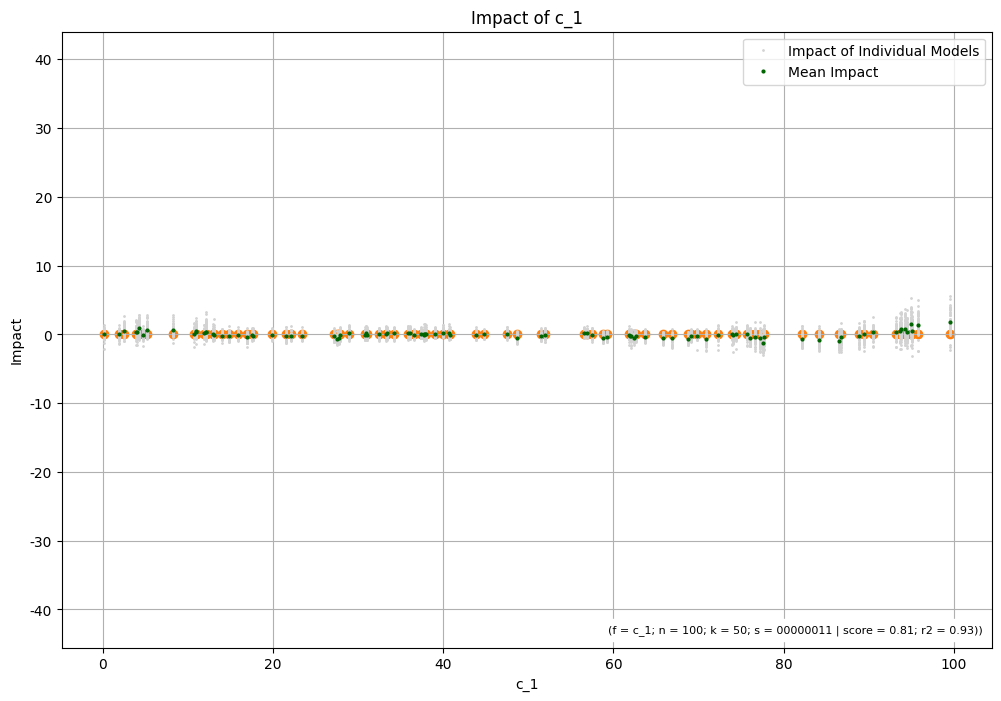

In [12]:
impact_charts = impact_model.impact_charts(
    X_prime,
    X_prime.columns,
    subplots_kwargs=dict(figsize=(12, 8)),
)

for col in df_true_impact.columns:
    fig, ax = impact_charts[col]
    ax.scatter(
        df[col],
        df_true_impact[col],
        c="C1",
        label="Actual impact",
    )

In [13]:
df_model_impact = impact_model.mean_impact(X_prime)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
# RMSE
np.sqrt(
    pd.DataFrame(
        [mean_squared_error(df_true_impact, df_model_impact, multioutput="raw_values")],
        columns=df_true_impact.columns,
    )
)

,x_0,x_1,c_0,c_1
0,3.654297,5.77773,0.295335,0.469744


In [16]:
pd.DataFrame(
    [mean_absolute_error(df_true_impact, df_model_impact, multioutput="raw_values")],
    columns=df_true_impact.columns,
)

,x_0,x_1,c_0,c_1
0,2.908021,3.832148,0.253327,0.332936
